In [1]:
from utils import setrootdir
setrootdir("ppgcc-coautorias")

'Directory ppgcc-coautorias successfully loaded as current working directory.'

In [2]:
import os

from dotenv import load_dotenv

import seaborn as sns

sns.set_style("whitegrid")

from src.visualization import Visualizer, generate_labels

In [3]:
load_dotenv()

DATASET_DIRECTORY = os.getenv("DATASET_DIRECTORY")
METADATA_FILE = os.getenv("METADATA_FILE")

# 3. Visualization - Counts

In [4]:
visualizer = Visualizer(
    data_dir=DATASET_DIRECTORY,
    metadata_file=METADATA_FILE,
    step_directory="04-visualization"
)

In [5]:
df_productions = visualizer.read_parquet(step="03-transformation", name="productions")
df_productions

,production_id,name,citation,nid,lattes_id,institution,production,aid,authors,type,year,issn
0,3,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ MARIA N.,...",830,3640497501056163,UFJF,Scientific Provenance Metadata Capture and Man...,119076,Wander Gaspar,PERIODICO,2015,17442621
1,3,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ MARIA N.,...",830,3640497501056163,UFJF,Scientific Provenance Metadata Capture and Man...,1384,Regina Maria Maciel Braga,PERIODICO,2015,17442621
2,3,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ MARIA N.,...",830,3640497501056163,UFJF,Scientific Provenance Metadata Capture and Man...,43349,Fernanda Cláudia Alves Campos,PERIODICO,2015,17442621
3,3,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ MARIA N.,...",830,3640497501056163,UFJF,Scientific Provenance Metadata Capture and Man...,830,Jose Maria Nazar David,PERIODICO,2015,17442621
4,3,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ MARIA N.,...",830,3640497501056163,UFJF,Scientific Provenance Metadata Capture and Man...,112697,Tatiane Ornelas Martins Alves,PERIODICO,2015,17442621
...,...,...,...,...,...,...,...,...,...,...,...,...
495575,230929,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, ARAUJO, L. S., L....",952,6358983442870515,UFF,Gerando base de grafos não isomorfos com seus ...,1050,Luís Felipe Ignácio Cunha,CONFERENCIA,2023,None
495576,230930,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, ARAUJO, L. S., L....",952,6358983442870515,UFF,Paralelismo e Heurísticas para o problema da m...,113452,Thiago Lopes Nascimento,CONFERENCIA,2023,None
495577,230930,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, ARAUJO, L. S., L....",952,6358983442870515,UFF,Paralelismo e Heurísticas para o problema da m...,642,Fábio Protti,CONFERENCIA,2023,None
495578,230930,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, ARAUJO, L. S., L....",952,6358983442870515,UFF,Paralelismo e Heurísticas para o problema da m...,1050,Luís Felipe Ignácio Cunha,CONFERENCIA,2023,None


## 3.2. Yearly publications by institution

In [15]:
df_yearly_publications = visualizer.frame_yearly_publications(
    df_productions,
    start_year=2014, end_year=2023
)

df_yearly_publications

type,CONFERENCIA,PERIODICO
year,,
2014,25461,11578
2015,25223,11793
2016,26499,13965
2017,26254,13831
2018,28919,14813
2019,28320,16770
2020,25739,20985
2021,23823,22835
2022,21127,21092


/home/hellsdeur/Code/lid/ppgcc-coautorias/src/visualization.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_yearly_publications.set_yticklabels(ax_yearly_publications.get_yticks().astype(int), fontsize=12)


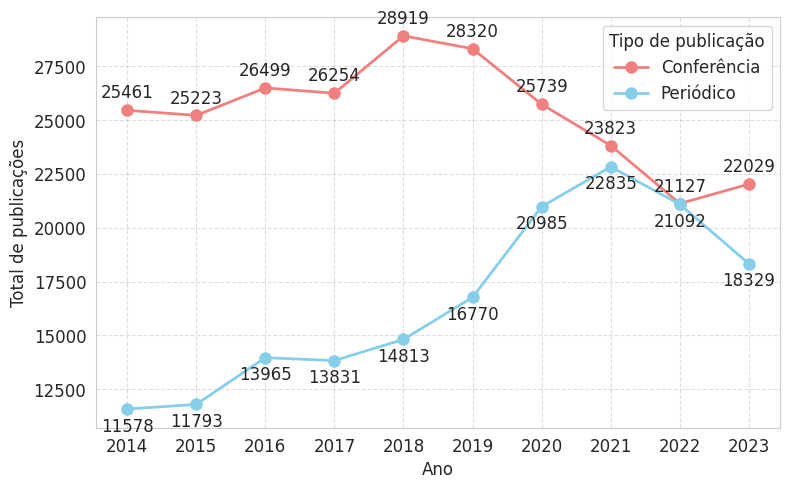

In [16]:
fig_yearly_publications, ax_yearly_publications = visualizer.plot_yearly_publications(
    df_yearly_publications,
    figsize=(8, 5),
    filename="yearly_publications"
)

fig_yearly_publications;

## 3.3. Publications by professor

In [22]:
df_publications_by_researcher = visualizer.publications_by_researcher(
    df_productions,
    institution="UFPA"
)

df_publications_by_researcher

type,name,CONFERENCIA,PERIODICO,total
0,Rommel Thiago Juca Ramos,9,1293,1302
1,Joao Crisóstomo Weyl Albuquerque Costa,578,499,1077
2,Eduardo Coelho Cerqueira,569,398,967
3,Gustavo Pessin,455,420,875
4,Denis Lima do Rosário,520,318,838
5,Sandro Ronaldo Bezerra Oliveira,599,89,688
6,Aldebaro Barreto da Rocha Klautau Júnior,318,189,507
7,Carlos Renato Lisboa Francês,159,296,455
8,Cleidson Ronald Botelho de Souza,322,110,432
9,Gustavo Henrique Lima Pinto,280,138,418


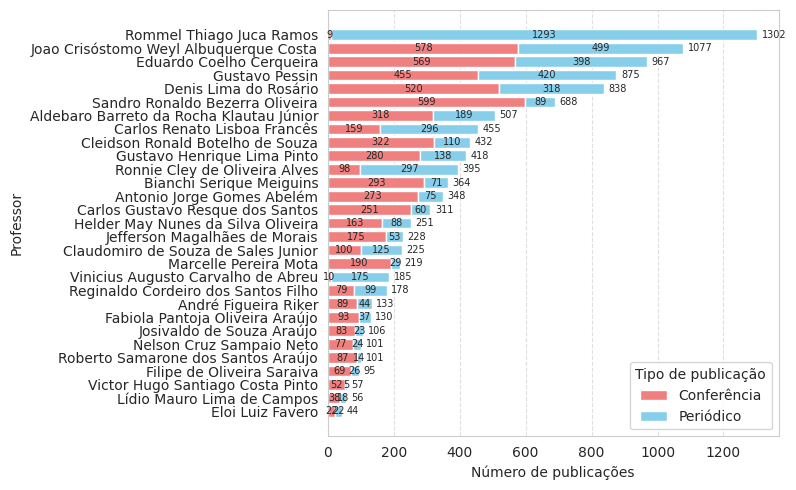

In [23]:
fig_publications_by_researcher, ax_publications_by_researcher = visualizer.plot_publications_by_researcher(
    df_publications_by_researcher,
    figsize=(8, 5),
    filename="publications_by_researcher"
)

fig_publications_by_researcher;